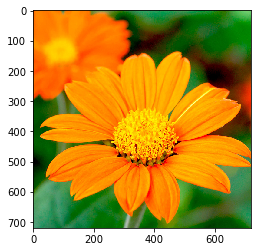

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial import Delaunay

%matplotlib inline
%load_ext autoreload
%autoreload 2

im = plt.imread("C:/Users/Aniket/Desktop/some.jpg")
#im = im[400:3800,:2000,:]    
plt.imshow(im)

In [2]:
from triangulared import *

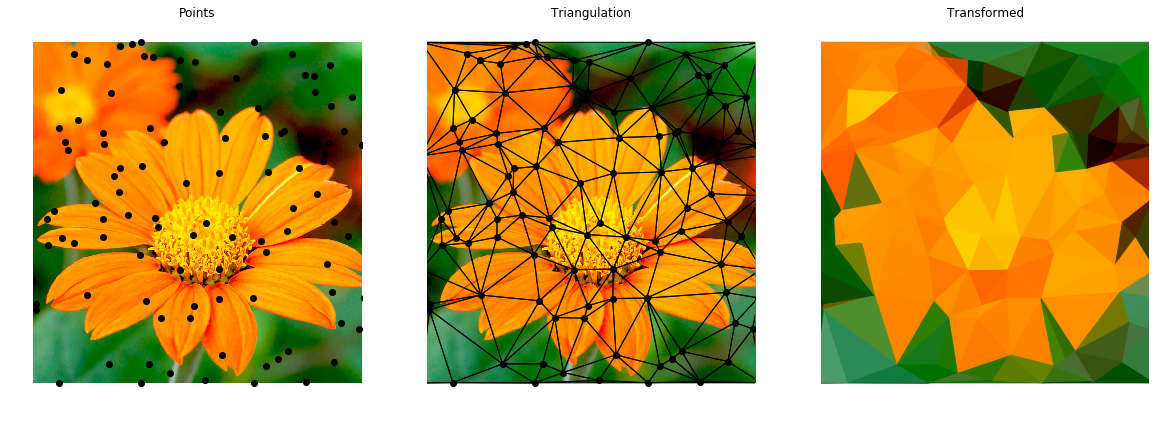

In [9]:
points = generate_uniform_random_points(im, n_points=100)
tri = Delaunay(points)

fig, axs = plt.subplots(ncols=3, figsize=(20,7), sharey=True)

ax = axs[0]
draw_image(ax, im)
draw_points(ax, points)
ax.set_title("Points")
set_axis_defaults(ax)


ax = axs[1]
draw_image(ax, im)
draw_points(ax, points)
draw_triangles(ax, tri.points, tri.vertices)
ax.set_title("Triangulation")
set_axis_defaults(ax)


ax = axs[2]
triangle_colours = get_triangle_colour(tri, im)
draw_triangles(ax, tri.points, tri.vertices, triangle_colours)
ax.set_title("Transformed")
set_axis_defaults(ax)

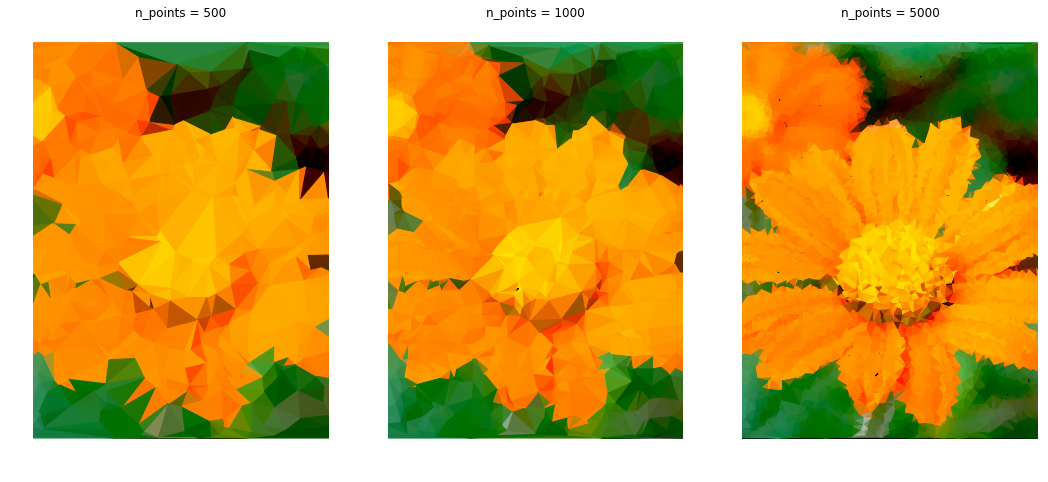

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(18,8), sharey=True)

for ax, n_points in zip(axs, [500,1000,5000]):
    points = generate_uniform_random_points(im, n_points=n_points)
    tri = Delaunay(points)
    ax.invert_yaxis()
    triangle_colours = get_triangle_colour(tri, im)
    draw_triangles(ax, tri.points, tri.vertices, triangle_colours)
    ax.set_title("n_points = {}".format(n_points))
    set_axis_defaults(ax)


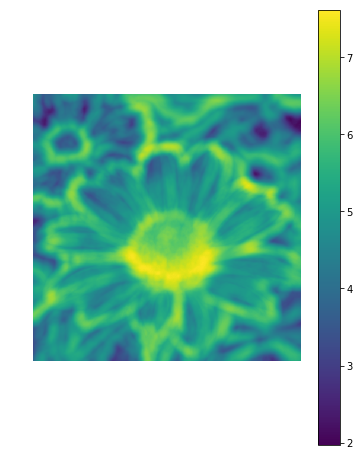

In [11]:
from skimage import filters, morphology, color

entropy_width = 20

# convert to grayscale
im2 = (255 * color.rgb2gray(im)).astype("uint8")

# calculate entropy
im2 = filters.rank.entropy(im2, morphology.disk(entropy_width))

# plot it
fig, ax = plt.subplots(figsize=(6,8), sharey=True)
cax = ax.imshow(im2)
set_axis_defaults(ax)
fig.colorbar(cax);

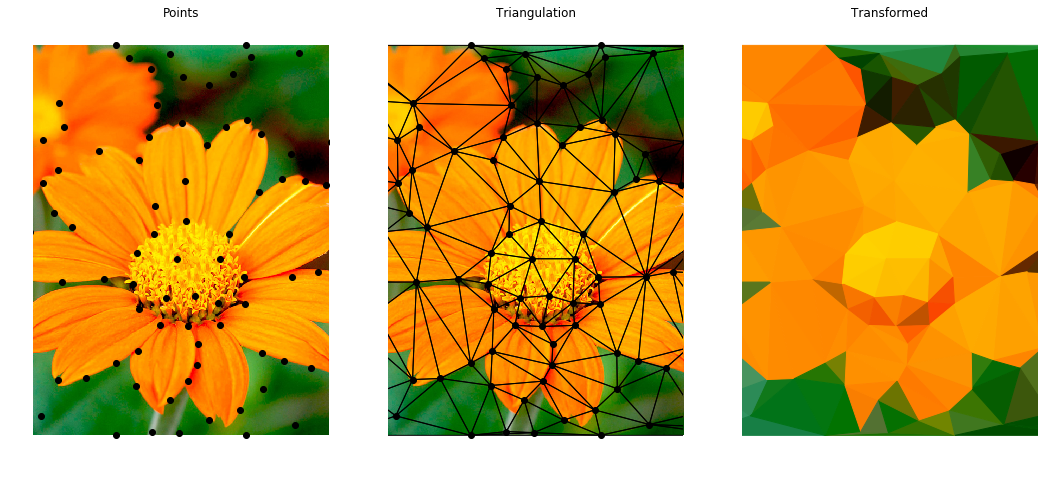

In [12]:
points = generate_max_entropy_points(im)
points = np.concatenate([points, edge_points(im)])

tri = Delaunay(points)

fig, axs = plt.subplots(ncols=3, figsize=(18,8), sharey=True)

ax = axs[0]
draw_image(ax, im)
draw_points(ax, points)
ax.set_title("Points")
set_axis_defaults(ax)


ax = axs[1]
draw_image(ax, im)
draw_points(ax, points)
draw_triangles(ax, tri.points, tri.vertices)
ax.set_title("Triangulation")
set_axis_defaults(ax)


ax = axs[2]
triangle_colours = get_triangle_colour(tri, im)
draw_triangles(ax, tri.points, tri.vertices, triangle_colours)
ax.set_title("Transformed")
set_axis_defaults(ax)


MemoryError: 

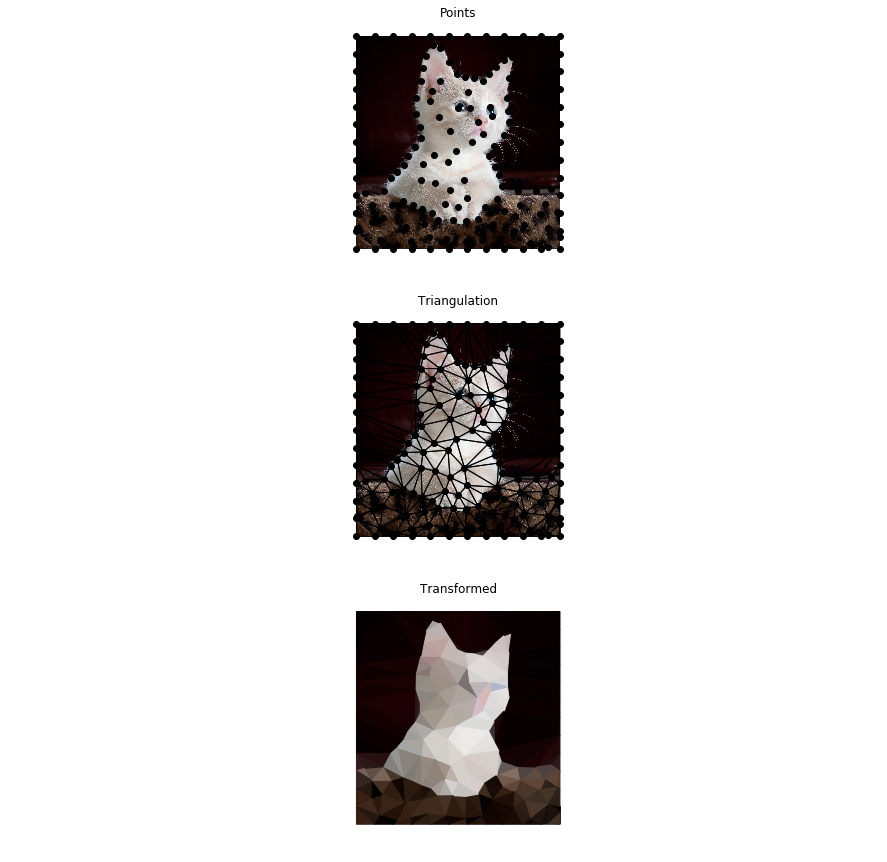

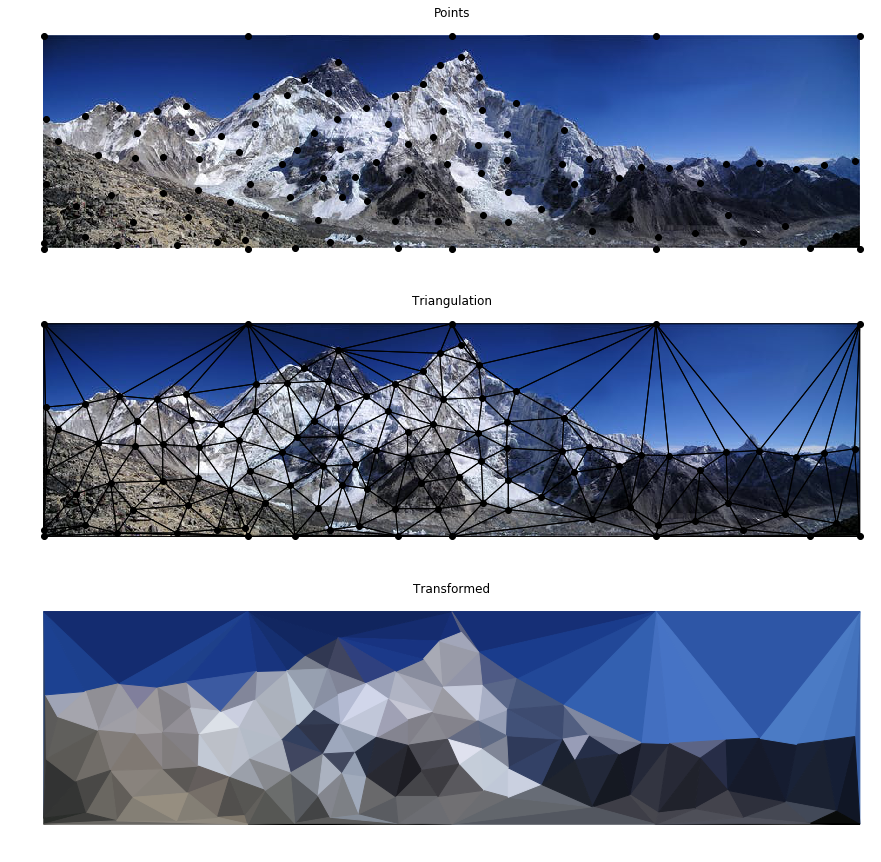

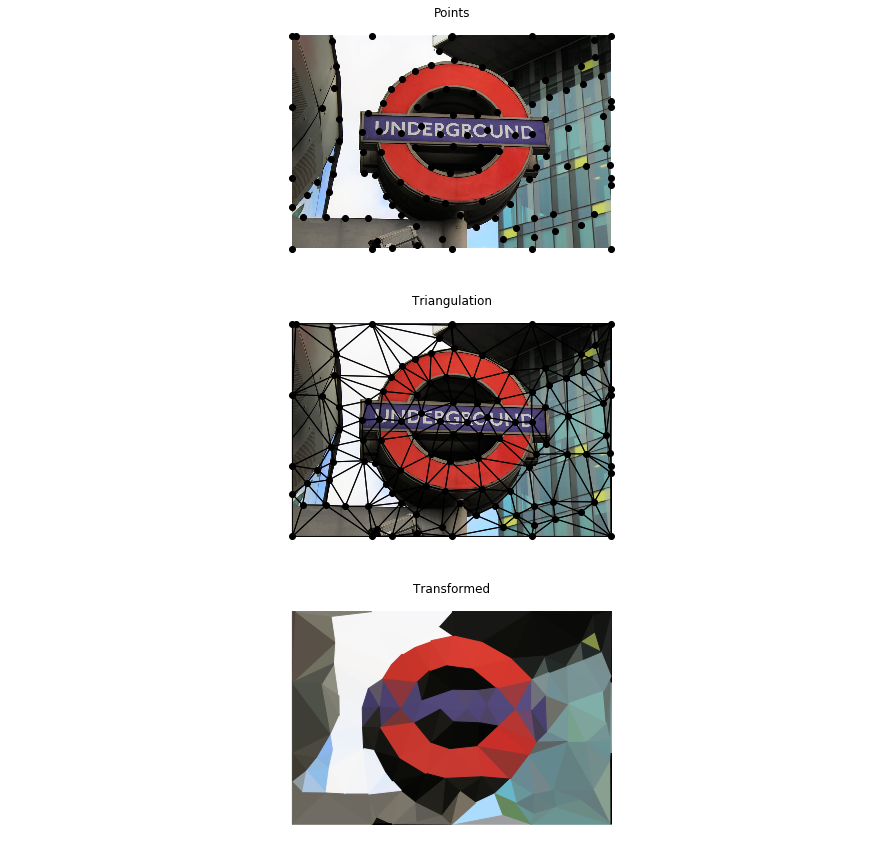

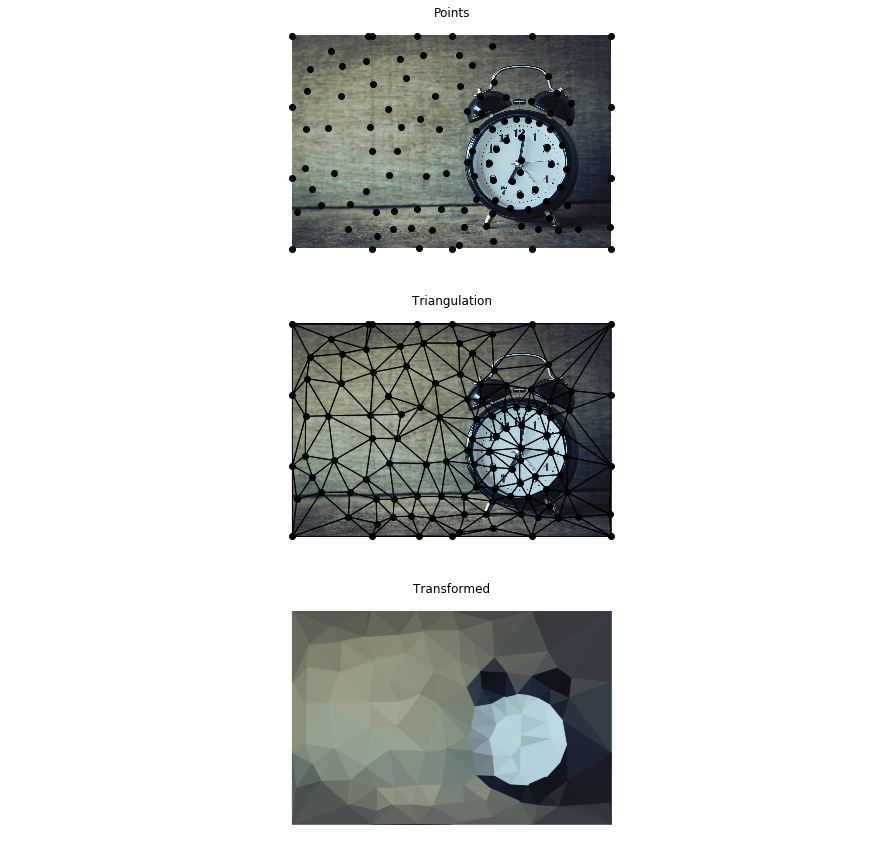

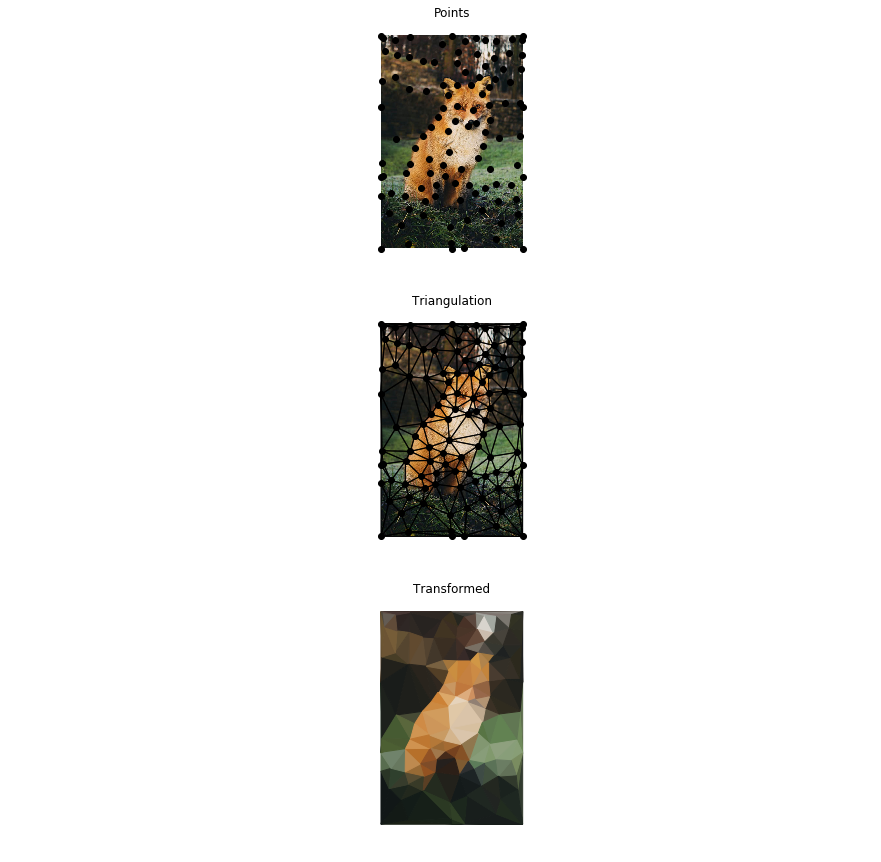

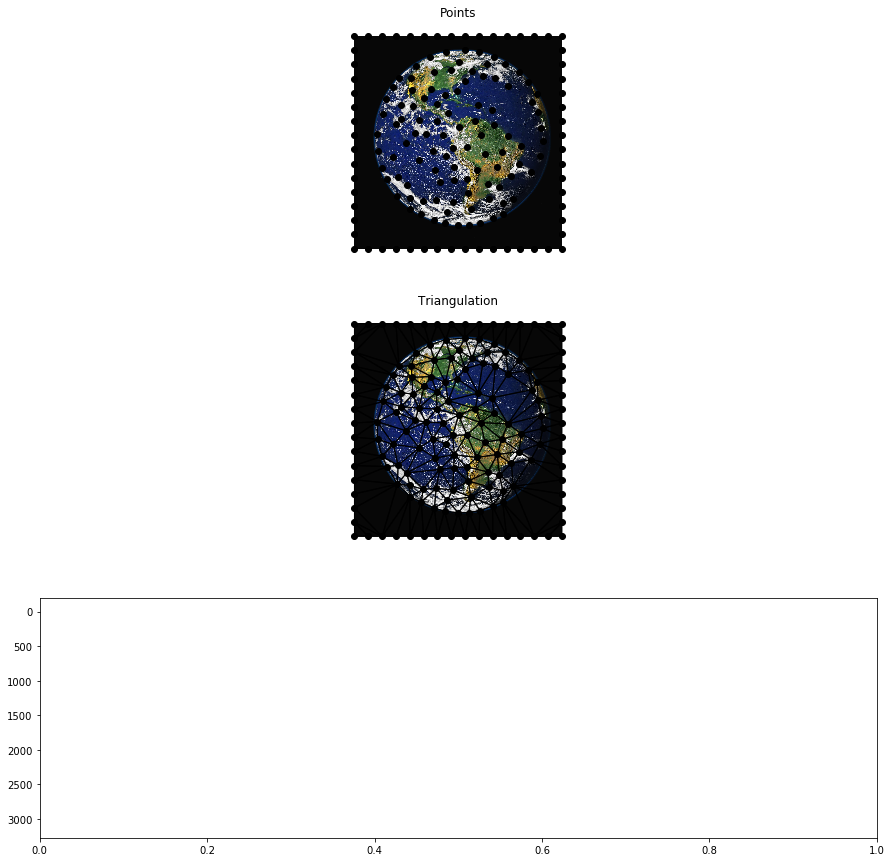

In [16]:
import glob

photo_files = glob.glob("test-images/*")

t = photo_files[1]

current_im = plt.imread(t)

for ci in photo_files:

    current_im = plt.imread(ci)

    current_points = generate_max_entropy_points(current_im)
    current_points = np.concatenate([current_points, edge_points(current_im)])
    tri = Delaunay(current_points)

    fig, axs = plt.subplots(nrows=3, figsize=(15,15), sharey=True)

    ax = axs[0]
    draw_image(ax, current_im)
    draw_points(ax, current_points)
    ax.set_title("Points")
    set_axis_defaults(ax)


    ax = axs[1]
    draw_image(ax, current_im)
    draw_points(ax, current_points)
    draw_triangles(ax, tri.points, tri.vertices)
    ax.set_title("Triangulation")
    set_axis_defaults(ax)


    ax = axs[2]
    triangle_colours = get_triangle_colour(tri, current_im, agg_func=np.median)
    draw_triangles(ax, tri.points, tri.vertices, triangle_colours)
    ax.set_title("Transformed")
    set_axis_defaults(ax)